# Анализ тональности

В этом разделе мы проанализируем мнение общественности о различных продуктах, купленных через Amazon. Для этого мы будем использовать анализатор тональности TextBlob.

In [184]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
import pandas as pd

df = pd.read_csv('Womens_Reviews.csv')

In [29]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


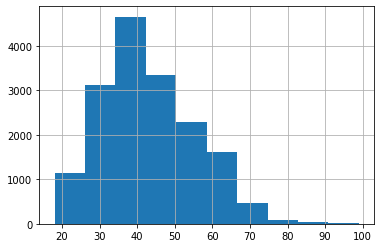

In [30]:
df['Age'].hist();

Текстовый обзор о еде содержится в столбце «Text». Столбец Score содержит оценки пользователя для конкретного продукта, где 1 - самый низкий, а 5 - самый высокий рейтинг.

Давайте посмотрим распределение рейтинга:

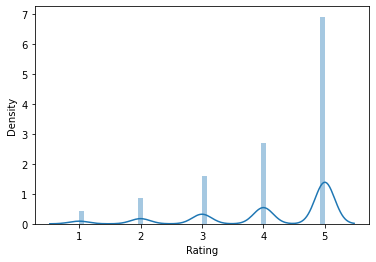

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df['Rating']);

Видно, что большинство рейтингов позитивные (==5). Давайте построим гистограмму для рейтингов, чтобы взглянуть на количество записей для каждого рейтинга.

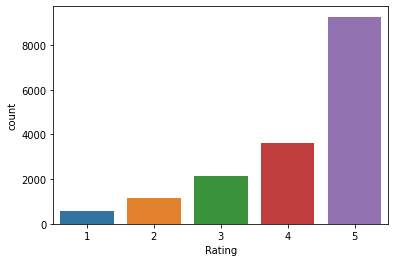

In [32]:
sns.countplot(x='Rating', data=df);

In [37]:
df['Review Text']

0        I had such high hopes for this dress and reall...
1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses, but this one is no...
4        I aded this in my basket at hte last mintue to...
                               ...                        
16738    I ordered the floral version of this swimsuit ...
16739    I purchased this top online, love the off the ...
16740    Very comfortable, well made, great with leggin...
16741    This is a very well made sweater. it is a nice...
16742    Love the lightweight fabric! looks great with ...
Name: Review Text, Length: 16743, dtype: object

# Сентиментальность

Посмотрим глазами на произвольный отзыв

In [190]:
df['Review Text'][350]

'These jeans are so cute! they are perfect for petites too! i am fit, look way younger than my age and get so many compliments when i wear these jeans. i\'m. i\'m 5\'2", 115 libs and they definitely fit tight in a good way. just like the photo pretty much. they are not small like the white mother ankle fray jeans for sale on the site now. those definitely run smaller so these are true to size with a tight fit.'

Похоже, что отзыв положительный. Давайте проверим это с помощью библиотеки TextBlob. Чтобы найти тональность, мы должны использовать атрибут sentiment объекта TextBlob. Объект sentiment возвращает кортеж, который с тональностью и субъективностью отзыва.

Значение тональности может быть между -1 и 1, когда отзывы отрицательные, и тональность должна быть <0, когда же отзывы положительнеые, и тональность должна быть >0.

Значение субъективности может быть между 0 и 1. Субъективность количественно определяет долю личного мнения и фактической информации, содержащейся в тексте. Более высокая субъективность означает, что текст содержит личное мнение, а не фактическую информацию.

In [193]:
# !pip3 install textblob

In [192]:
from textblob import TextBlob

In [194]:
text_blob_object = TextBlob(df['Review Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.27016806722689074, subjectivity=0.4777310924369748)


Давайте добавим столбец тональности в наш набор данных.

In [197]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

df['Sentiment_Polarity'] = df['Review Text'].apply(find_polarity)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_preproc,text_no_stopwords,Sentiment_Polarity
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,0.073675
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"i love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,0.550000
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,0.512891
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"i love tracy reese dresses, but this one is no...",i love tracy reese dresses but this one is not...,0.178750
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,i aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...,0.133750


Посмотрим на распределение отзывов по полярности:

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

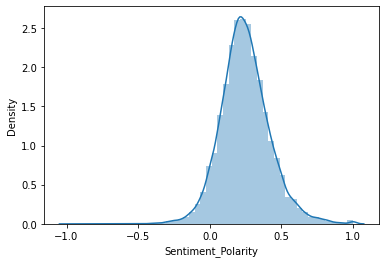

In [199]:
sns.distplot(df['Sentiment_Polarity'])

Из приведенного выше рисунка видно, что большинство отзывов являются положительными и имеют полярность от 0 до 0,5. Это естественно, так как большинство отзывов в наборе данных имеют 5-звездочные рейтинги.

Давайте построим среднюю полярность для каждого рейтинга.

<AxesSubplot:xlabel='Rating', ylabel='Sentiment_Polarity'>

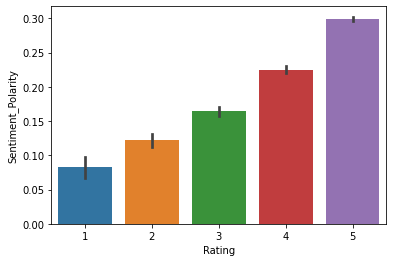

In [200]:
sns.barplot(x='Rating', y='Sentiment_Polarity', data=df)

Результат показывает, что отзывы с высокими баллами имеют высокую положительную полярность.

Давайте теперь посмотрим на некоторые из самых негативных отзывов, то есть на отзывы с полярностью -1.

In [206]:
most_negative = df[df.Sentiment_Polarity == -1]['Review Text'].head()
print(most_negative)

Series([], Name: Review Text, dtype: object)


In [211]:
most_negative = df[df.Sentiment_Polarity == \
                   df.Sentiment_Polarity.min()]['Review Text'].head()
print(most_negative.values[0])

Cut out design, no seems or hems.
 very disappointed in retailer


Фу, читать противно.

Посмотрим лучше на что-то позитивное:

In [218]:
most_positive = df[df.Sentiment_Polarity == 1]['Review Text']
for text in most_positive.values:
    print(text)

For a now feel, that comfy and well made, this was a great choice!
This is a perfect jacket over any shirt, tee, or dress. jacket is well made and goes with anything!
If there ever was the perfect feminine dress, this would be it .
This dress is so versatile. great summer wear!
Perfect way to add warmth in transition weather
This is awesome multi-season dress.
These are so comfy! mom of two boys on the go! great for running around and then can be dressed up for a night out on the town! not mom jeans!
Well made & lined. great find for the fall!
Absolutely gorgeous!
words can't describe the beauty of this dress!
i hope they will restock it cause i would order size s (didn't know how it runs).
Beautiful blend of colors and the texture of the shirt is so soft...perfect fall weather garment!
Great purchase! i bought the coat to wear to work.
My daughter had one and wore it with everything.i ended up getting one myself.it is a perfect weight.
I ordered the orange color too. these are perfect

Пункт 106 немного настораживает. Посмотрим на него внимательно:

In [145]:
df['Review Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

Отзыв не слишком уж положительный, но ему была назначена полярность 1 из-за присутствия таких слов, как «excellent» и «reputation». Важно знать, что анализатор настроений не на 100% защищен от ошибок и в некоторых случаях может предсказать неверную тональность. Но и правильно предсказывать он тоже умеет :)

In [146]:
df['Review Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'

В действительности вышеизложенный Sentiment-analysis, зашитый в TextBlob, это предобученный Наивный Байесовский Классификатор (звучит сложновато и немного уничижительно, но это не страшно). Ниже ссылки-доказательства моего утверждения :) 

[Proof link StackOverflow](https://stackoverflow.com/questions/43871019/polarity-calculation-in-sentiment-analysis-using-textblob)

[Ссылка на код в TextBlob](https://github.com/sloria/TextBlob/blob/90cc87ab0f9e25f37379079840ec43aba59af440/textblob/en/sentiments.py)

[Ссылка на код в NLTK](http://www.nltk.org/_modules/nltk/classify/naivebayes.html)

Давайте разберем, что это за алгоритм такой и как он здесь используется. 

**Ссылки:**

[Условная вероятность](https://ru.wikipedia.org/wiki/Условная_вероятность#Предельная_вероятность_равна_условной_вероятности)
[Теорема Байеса](https://ru.wikipedia.org/wiki/Теорема_Байеса)
[Наивный Байесовский Классификатор](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)

А еще можно читать [тут](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)
и [тут](https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0)

Коротко о том, что тут происходит. Наивный Байесовский классификатор помогает посчитать вероятность того, что конкретное слово окажется в положительном/отрицательном отзыве. Эта вероятность от нуля до единицы. Можно перевести ее в некую величину  от -1 до 1 (простенькое отображение) и назовем эту величину полярностью/тональностью слова - тональность 1 => вероятность найти такое слово в положительном отзыве велика, тональность = -1 => вероятность найти слово в положительном отзыве крайне мала. Теперь для каждого слова из словаря у нас есть готовая вероятность. 

После этого делается следующее:

Смотрим на новый отзыв, разбиваем его на слова. Слова могут быть:
* Известными(с известной полярностью)
* Неизвестными(если слова нет в словаре, TextBlob считает, что его вообще нет) или несущественными(TextBlob не ьерет в расчет слова типа артиклей и тд)
* Словами-модификаторами (not, very и тд)

Тональность отзыва считается так:
1. Отбрасываем все неизвестные и несущественные слова
2. Берем слова-модификаторы(их действие распространяется только на слово, идущее за ними) и с их помощью как-то меняем полярность следующего слова
3. Считаем для каждого слова-не-модификатора результирующую полярность
4. Усредняем полученную полярность для всех слов-не модификаторов. Эта усредненная оценка и будет полярностью отзыва.
5. Готово, вы восхитительны

Давайте разберем на примере

In [147]:
from textblob import TextBlob

TextBlob("not a very great calculation").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

[Здесь](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) можно посмотреть слова, по которым он это делает.

А само по себе слово great?

In [152]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [162]:
TextBlob("not good").sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

Так, добавление not умножает полярность на -0.5

In [158]:
TextBlob("very good").sentiment.polarity/TextBlob("good").sentiment.polarity

1.3

А еще у некоторых слов есть свойство intensity. только что наша полярность умножилась именно на нее

In [159]:
TextBlob("not a very great").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

Артикли и вспомогательные слова TextBlob игнорирует. А вот модификация здесь произошла хитрым образом:
    
* **polarity** = **-0.5**(not)***1/1.3**(very)***0.8**(great)
* **subjectivity** = **1/1.3**(very)***0.75**(great)

In [89]:
TextBlob("very")

TextBlob("very")

А вот этого слова нет в словаре. И поэтому ничего не происходит)

In [160]:
TextBlob("abominable").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [92]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Как видите, все усреднилось:

In [161]:
TextBlob("great good").sentiment

Sentiment(polarity=0.75, subjectivity=0.675)